In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
tf.random.set_seed(3)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(x_train[15])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 115 121 162
  253 253 213   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  63 107 170 25

In [5]:
print(x_train[15].shape)

(28, 28)


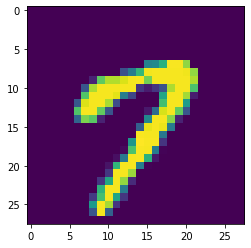

In [6]:
plt.imshow(x_train[15])
plt.show()

In [7]:
print(y_train[15])

7


In [8]:
#unique values
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [9]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [10]:
print(x_train[15])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Neural Network

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.3,shuffle=True)

Epoch 1/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2565 - accuracy: 0.9231 - val_loss: 0.1463 - val_accuracy: 0.9572
Epoch 2/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1109 - accuracy: 0.9653 - val_loss: 0.1332 - val_accuracy: 0.9624
Epoch 3/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0777 - accuracy: 0.9753 - val_loss: 0.1253 - val_accuracy: 0.9651
Epoch 4/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.1024 - val_accuracy: 0.9699
Epoch 5/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.9842 - val_loss: 0.1022 - val_accuracy: 0.9727
Epoch 6/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0419 - accuracy: 0.9861 - val_loss: 0.1035 - val_accuracy: 0.9748
Epoch 7/25
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0335 - accuracy: 0.9886 - val_loss: 0.1270 - val_accuracy:

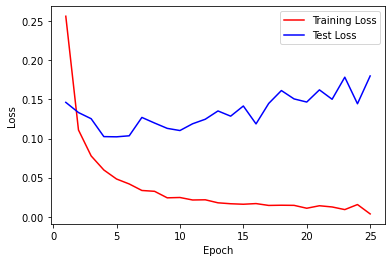

In [14]:
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

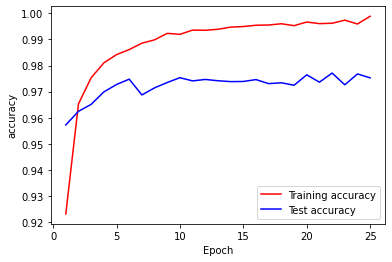

In [15]:
training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize loss history
plt.plot(epoch_count, training_accuracy, 'r')
plt.plot(epoch_count, test_accuracy, 'b')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show();

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1342 - accuracy: 0.9808


In [17]:
print(loss)
print(accuracy)

0.1341841071844101
0.9807999730110168


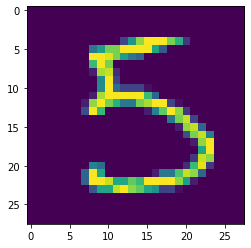

In [18]:
plt.imshow(x_test[15])
plt.show()

In [19]:
print(y_test[15])

5


In [20]:
y_pred=model.predict(x_test)

In [21]:
print(y_pred[15])

[1.81079868e-16 7.71490619e-13 1.06396324e-13 3.88082697e-07
 4.88894550e-11 9.99999523e-01 2.47353776e-10 1.14510583e-16
 1.64790038e-07 9.08843556e-10]


In [22]:
np.argmax(y_pred[15])

5

In [23]:
y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
print(confusion_matrix(y_test,y_pred_labels))


[[ 969    0    1    1    0    1    5    1    2    0]
 [   0 1122    6    0    0    0    3    1    3    0]
 [   1    0 1017    2    4    0    1    4    3    0]
 [   1    0    5  988    0    1    0    5    5    5]
 [   1    0    1    0  967    0    3    3    1    6]
 [   2    0    0    6    4  864    5    0   10    1]
 [   1    2    0    0    3    2  948    0    2    0]
 [   0    2    6    1    2    0    0 1014    2    1]
 [   2    0    3    2    6    1    4    5  949    2]
 [   3    3    0    3   18    3    0    2    7  970]]


In [26]:
print(classification_report(y_test,y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.96      0.98      0.97       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

